In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tornado import gen
from tornado.ioloop import IOLoop
from aimetrics import metrics
%matplotlib inline

In [3]:
data = {}
@gen.coroutine
def get_data():
    data['drones'] = yield metrics.fetch_data("http://localhost:3002/", "bst", "drone", auth_username="bst", auth_password="bst")
    return data

IOLoop.instance().add_callback(get_data)

In [5]:
data

{'drones': {'X': array([[  3.26576770e+01,   8.09563000e-01,   4.60428480e+01,
            9.70800000e+02,   8.29890000e-02],
         [  4.09436680e+01,   7.91728000e-01,   1.02575842e+02,
            9.70800000e+02,   9.32500000e-02],
         [  4.81341180e+01,   1.86737400e+00,   2.33055019e+02,
            9.70800000e+02,   1.37724000e-01],
         ..., 
         [  5.00206640e+01,   2.55758000e+00,   1.94214740e+01,
            9.70800000e+02,   7.20720000e-02],
         [  5.05836110e+01,   1.03252600e+00,   1.41615804e+02,
            9.70800000e+02,   8.19790000e-02],
         [  4.81805500e+01,   1.97514800e+00,   1.82064707e+02,
            9.70800000e+02,   9.24340000e-02]]),
  'classes': dict_keys(['large drone', 'person', 'airplane', 'vehicle', 'medium drone', 'small drone', 'bird']),
  'features': dict_keys(['range', 'speed', 'heading', 'altitude', 'rcs']),
  'y': array([[0, 1, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 1, 0],
       

In [6]:
X = pd.DataFrame(data['drones']['X'], columns=data['drones']['features'])

In [14]:
from sklearn.preprocessing import normalize
X_norm = normalize(X)
X_norm.max(axis=0)

array([  6.41139596e-02,   3.63866608e-03,   3.29462011e-01,
         9.99287767e-01,   1.70173731e-04])

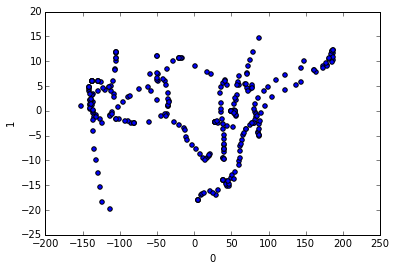

In [8]:
from sklearn.decomposition import PCA
X_PCA = pd.DataFrame(PCA(2).fit_transform(X))
X_PCA.plot(kind='scatter', x=0, y=1)

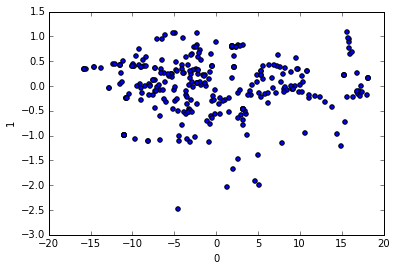

In [9]:
from sklearn.decomposition import PCA
X_PCA_2 = pd.DataFrame(PCA(2).fit_transform(X[['rcs','speed', 'range']]))
X_PCA_2.plot(kind='scatter', x=0, y=1)

In [17]:
y = pd.DataFrame(data['drones']['y'], columns=data['drones']['classes'])[['small drone', 'person']]

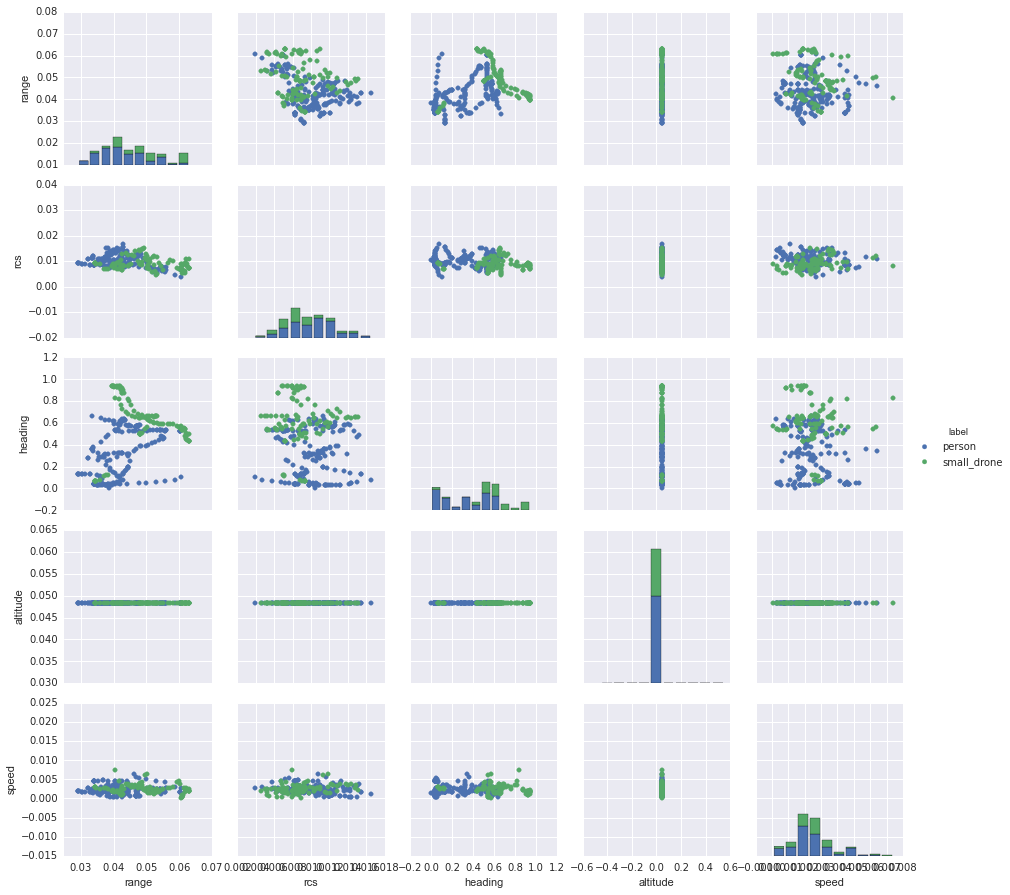

In [18]:
import seaborn as sns
Xy = X.copy()
Xy['small_drone'] = y['small drone']
Xy['person'] = y['person']
Xy['label'] = Xy['small_drone'].apply(lambda x: "small_drone" if x == 1 else "person")
del Xy['small_drone']
del Xy['person']
sns.pairplot(Xy, hue='label')

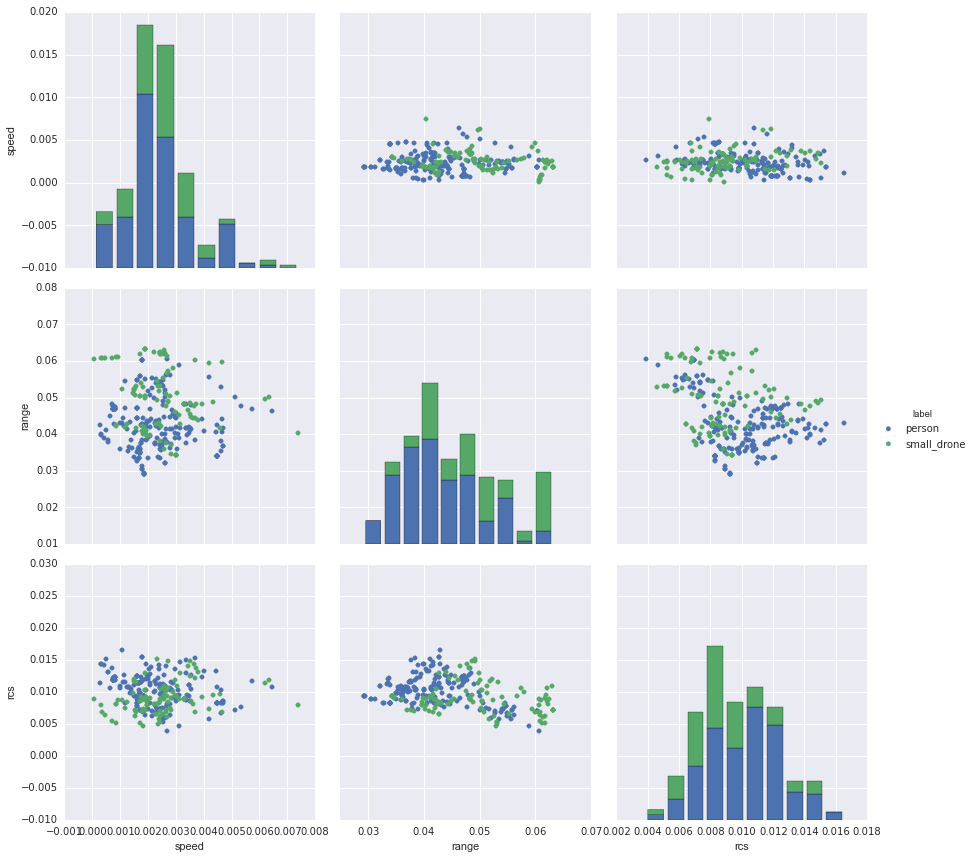

In [19]:
sns.pairplot(Xy[['speed', 'range', 'rcs', 'label']], hue='label', size=4)

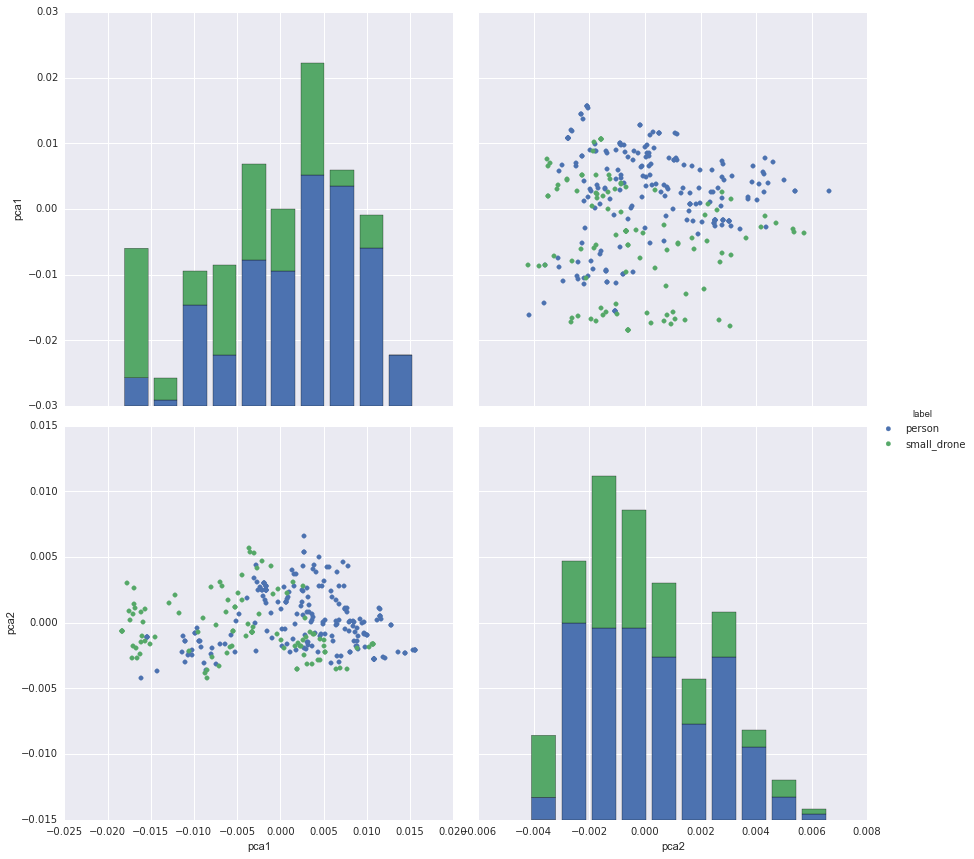

In [20]:
Xy[['pca1', 'pca2']] = X_PCA_2
sns.pairplot(Xy[['pca1', 'pca2', 'label']], hue='label', size=6)

In [21]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Xy_drones = Xy[Xy.label=="small_drone"]
xs = Xy_drones['rcs'].values
ys = Xy_drones['range'].values
zs = Xy_drones['speed'].values
ax.scatter(xs, ys, zs, c='r')
Xy_person = Xy[Xy.label=="person"]
xs = Xy_person['rcs'].values
ys = Xy_person['range'].values
zs = Xy_person['speed'].values
ax.scatter(xs, ys, zs, c='b')
ax.set_xlabel('RCS')
ax.set_ylabel('Range')
ax.set_zlabel('Speed')

plt.show()


ImportError: libpyside.cpython-34m.so.1.2: cannot open shared object file: No such file or directory